In [1]:
import os, io, sys
import typing
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# skimage.filters import threshold_otsu

import gudhi,gudhi.hera,gudhi.wasserstein,persim

In [2]:
import pymatgen.core as mg
from pymatgen.io.cif import CifWriter
from pymatgen.io.cif import CifFile
from pymatgen.core.structure import Structure

In [3]:
import plotly
import plotly.graph_objs as go
import plotly.subplots as sp
import ipywidgets as widgets
import plotly.offline as pyo
from pdHash import *
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot
from PIL import Image


In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
import ripserplusplus as rpp

In [6]:

inDir="Z:/data/diverse_metals"
os.chdir(inDir)
hinDir="Z:/data/diverse_metals/hMOF-1039C2-CO2"
hdf=pd.read_csv(f"{inDir}/hMOF_CO2_info.csv",index_col=0)

hIndexMap={int(fName[fName.find('-')+1:]):fName for fName in hdf.index}
hdf.head()

,MOFid,CO2_wc_001,CO2_wc_005,CO2_wc_01,CO2_wc_05,CO2_wc_25
MOF,,,,,,
hMOF-2000320,Oc1c(C#Cc2cc(C#Cc3ccc(c(c3)O)C(=O)[O-])cc(c2)C...,0.039966,0.274536,0.349154,1.45382,4.63744
hMOF-25635,Fc1nccc(c1)c1cc(F)nc(c1F)F.[O-]C(=O)C1=C(F)[C]...,0.626616,1.499100,1.842470,2.44913,2.79623
hMOF-5009809,N#Cc1cc(C(=O)[O-])c(cc1C#Cc1cc(C#N)c(c(c1)C#N)...,0.035490,0.245448,0.472023,1.01737,2.92524
hMOF-5067074,CO[CH]N1CC(O[CH2])[N]C(C1OC)(O)O[CH].COc1ccc(c...,0.128765,0.583541,1.158770,3.47487,5.67151
hMOF-5010907,N=NC1C(N=N)(N=N)C2(CCC1(C(=O)[O-])C(C2N=N)(N=N...,0.370436,1.355700,1.828670,2.61471,2.92796


In [7]:
regVar="CO2_wc_01"
hdf.sort_values(by=regVar).iloc[-20:]

,MOFid,CO2_wc_001,CO2_wc_005,CO2_wc_01,CO2_wc_05,CO2_wc_25
MOF,,,,,,
hMOF-5081391,CCCc1cc(cc(c1C(=O)[O-])C[CH2])N1C(=O)c2ccc3c4c...,2.34663,4.58665,5.74221,7.38731,8.57168
hMOF-16890,CCC1=C(C=C(C(=[C]1)C(=O)[O-])CC)c1ccc(c(c1)CC)...,1.63714,4.62859,5.74256,7.23190,8.48336
hMOF-5077269,Cc1nc(C)c2c3c1ccc1c3c(c(c2C)C)c(nc1)C.[Cu][Cu]...,1.06031,4.00901,5.76579,8.05976,9.44632
hMOF-1002847,CCCc1c(cc2c3c1cc(CCC)c1c3c(c(c2CCC)C[CH2])cc(c...,2.78467,4.73969,5.79449,7.19234,8.41835
hMOF-1002891,CCc1cc2c(CC)cc(cc2c2c1c1cc(ccc1c(c2)CC)C(=O)[O...,3.65601,5.25704,5.81110,7.94077,9.14197
hMOF-5079271,CN=NC.[Cu][Cu].[O-]C(=O)C=CC(=O)[O-].[O-]C(=O)...,1.77450,4.36330,5.82606,7.50953,8.85764
hMOF-5079838,CCc1cc(C(=O)[O-])c(cc1N1[C]c2ccc3c4c2c(C1=O)cc...,2.08599,4.70731,5.84354,8.02385,9.13914
hMOF-5043749,Cc1ncc2c3c1ccc1c3c(c(c2)C)c(nc1C)C.[O-]C(=O)c1...,4.34753,5.56115,5.89633,6.40767,7.07442
hMOF-1003153,Cc1c(C)c(cc2c1cc(C)c1c2cc(c2c1cc(C(=O)[O-])c(c...,2.97471,5.17090,5.90413,8.56574,10.67880


In [8]:
np.random.seed(42)
trP=.8

numBins=20 # about 600 per bin if nbin=20
#regVars=cols
regVars=["CO2_wc_01"]
dfLen=len(hdf[regVars[0]])
bounds={k:[np.quantile(hdf[k],j/numBins) for j in range(1,numBins)] for k in regVars}


testBins = {k: [] for k in bounds.keys()} #currently 20% split, can be broken in half for val
for k in bounds.keys():
    for j in range(numBins):
        testBins[k].append(list(
            np.random.choice(hdf.sort_values(by=[k]).index[j*dfLen//numBins:(j+1)*dfLen//numBins], size=round((1 - trP)*dfLen//numBins),
                             replace=False)))
trainBins = {k: [] for k in bounds.keys()}
for k in bounds.keys():
    for j in range(numBins):
        trainBins[k].append(list(set(hdf.sort_values(by=[k]).index[j*dfLen//numBins:(j+1)*dfLen//numBins]) - set(testBins[k][j])))


In [9]:
outliars=["hMOF-7003364","hMOF-7003278"]
set(outliars) & set(testBins[regVar][-1])

{'hMOF-7003278'}

In [10]:
k=regVars[0]

np.quantile(hdf[k],.946)

1.997334579999998

In [70]:
def genAlphaSlider(dat,initial=1,step=1,maximum=10,titlePrefix=""): #assume 3D for now
    wid,hgt=950,800
    ac = gudhi.AlphaComplex(dat)
    st = ac.create_simplex_tree()
    skel=list(st.get_skeleton(2))
    skel.sort(key=lambda s: s[1])
    points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
    #lims=[[np.floor(np.min(dat[:,i])),np.ceil(np.max(dat[:,i]))] for i in range(3)]
    alpha = widgets.FloatSlider(
        value = initial,
        min = 0.0,
        max = maximum,
        step = step,
        description = 'Alpha:',
        readout_format = '.4f'
    )



    b1s=np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha.value])
    triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha.value])


    pts=go.Scatter3d(
        x = points[:, 0],
        y = points[:, 1],
        z = points[:, 2],
        mode='markers',
        marker=dict(
            size=2,
            color="cornflowerblue",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        ),
        name='$\sigma_0$'

    )

    sfig=[pts]

    linepts={0:[],1:[],2:[]}
    for i in b1s:
        linepts[0].append(points[i[0],0])
        linepts[1].append(points[i[0],1])
        linepts[2].append(points[i[0],2])
        linepts[0].append(points[i[1],0])
        linepts[1].append(points[i[1],1])
        linepts[2].append(points[i[1],2])

        linepts[0].append(None)
        linepts[1].append(None)
        linepts[2].append(None)

    if len(linepts[0])>0:
        lins=go.Scatter3d(
            x=linepts[0],
            y=linepts[1],
            z=linepts[2],
            mode='lines',
            name='$\sigma_1$',
            marker=dict(
                size=3,
                color="#d55e00",                # set color to an array/list of desired values
                #colorscale='Viridis',   # choose a colorscale
                opacity=.9
            )
        )
        sfig.append(lins)
        if len(triangles)>0:
            mesh = go.Mesh3d(
                x = points[:, 0],
                y = points[:, 1],
                z = points[:, 2],
                i = triangles[:, 0],
                j = triangles[:, 1],
                k = triangles[:, 2],
                color="#009e73",
                opacity=.75,
                name='$\sigma_2$'
            )


            sfig.append(mesh)
    fig=go.Figure(sfig)
    fig.update_layout(width=wid,height=hgt)
    #fig.show()




    def view_SC(alpha):
        if alpha==0:
            fig=go.Figure(sfig[0])
            fig.show()
        else:
            b1s=np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha])

            linepts={0:[],1:[],2:[]}
            for i in b1s:
                linepts[0].append(points[i[0],0])
                linepts[1].append(points[i[0],1])
                linepts[2].append(points[i[0],2])
                linepts[0].append(points[i[1],0])
                linepts[1].append(points[i[1],1])
                linepts[2].append(points[i[1],2])

                linepts[0].append(None)
                linepts[1].append(None)
                linepts[2].append(None)

            if len(linepts[0])>0:
                lins=go.Scatter3d(
                    x=linepts[0],
                    y=linepts[1],
                    z=linepts[2],
                    mode='lines',
                    name='$\sigma_1$',
                    marker=dict(
                        size=3,
                        color="#d55e00",                # set color to an array/list of desired values
                        #colorscale='Viridis',   # choose a colorscale
                        opacity=.85
                    )
                )
                if len(sfig)>1:
                    sfig[1]=lins
                else:
                    sfig.append(lins)
                triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha])
                if len(triangles)>0:
                    mesh = go.Mesh3d(
                        x = points[:, 0],
                        y = points[:, 1],
                        z = points[:, 2],
                        i = triangles[:, 0],
                        j = triangles[:, 1],
                        k = triangles[:, 2],
                        color="#009e73",
                        opacity=.5,
                        name='$\sigma_2$'
                    )

                    if len(sfig)>2:
                        sfig[2]=mesh
                    else:
                        sfig.append(mesh)


            fig=go.Figure(data=sfig,layout=go.Layout(width=wid,height=hgt,
                                                     title=f"{titlePrefix}:\nSimplicial complex with r <= {round(float(alpha),5)}",
                                                    ))

            #fig.show()
            iplot(fig)


    widgets.interact(view_SC, alpha = alpha);
    return st

In [71]:
def plot_diagrams(
    diagrams,
    plot_only=None,
    title=None,
    xy_range=None,
    labels=None,
    colormap="default",
    size=20,
    ax_color=np.array([0.0, 0.0, 0.0]),
    diagonal=True,
    lifetime=False,
    legend=True,
    show=False,
    ax=None,
    saveLoc=None
):
    """A helper function to plot persistence diagrams.

    Parameters
    ----------
    diagrams: ndarray (n_pairs, 2) or list of diagrams
        A diagram or list of diagrams. If diagram is a list of diagrams,
        then plot all on the same plot using different colors.
    plot_only: list of numeric
        If specified, an array of only the diagrams that should be plotted.
    title: string, default is None
        If title is defined, add it as title of the plot.
    xy_range: list of numeric [xmin, xmax, ymin, ymax]
        User provided range of axes. This is useful for comparing
        multiple persistence diagrams.
    labels: string or list of strings
        Legend labels for each diagram.
        If none are specified, we use H_0, H_1, H_2,... by default.
    colormap: string, default is 'default'
        Any of matplotlib color palettes.
        Some options are 'default', 'seaborn', 'sequential'.
        See all available styles with

        .. code:: python

            import matplotlib as mpl
            print(mpl.styles.available)

    size: numeric, default is 20
        Pixel size of each point plotted.
    ax_color: any valid matplotlib color type.
        See [https://matplotlib.org/api/colors_api.html](https://matplotlib.org/api/colors_api.html) for complete API.
    diagonal: bool, default is True
        Plot the diagonal x=y line.
    lifetime: bool, default is False. If True, diagonal is turned to False.
        Plot life time of each point instead of birth and death.
        Essentially, visualize (x, y-x).
    legend: bool, default is True
        If true, show the legend.
    show: bool, default is False
        Call plt.show() after plotting. If you are using self.plot() as part
        of a subplot, set show=False and call plt.show() only once at the end.
    """

    ax = ax or plt.gca()
    plt.style.use(colormap)

    xlabel, ylabel = "Birth", "Death"

    if not isinstance(diagrams, list):
        # Must have diagrams as a list for processing downstream
        diagrams = [diagrams]

    if labels is None:
        # Provide default labels for diagrams if using self.dgm_
        labels = ["$H_{{{}}}$".format(i) for i , _ in enumerate(diagrams)]

    if plot_only:
        diagrams = [diagrams[i] for i in plot_only]
        labels = [labels[i] for i in plot_only]

    if not isinstance(labels, list):
        labels = [labels] * len(diagrams)

    # Construct copy with proper type of each diagram
    # so we can freely edit them.
    diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]

    # find min and max of all visible diagrams
    concat_dgms = np.concatenate(diagrams).flatten()
    has_inf = np.any(np.isinf(concat_dgms))
    finite_dgms = concat_dgms[np.isfinite(concat_dgms)]

    # clever bounding boxes of the diagram
    if not xy_range:
        # define bounds of diagram
        ax_min, ax_max = np.min(finite_dgms), np.max(finite_dgms)
        x_r = ax_max - ax_min

        # Give plot a nice buffer on all sides.
        # ax_range=0 when only one point,
        buffer = 1 if xy_range == 0 else x_r / 5

        x_down = ax_min - buffer / 2
        x_up = ax_max + buffer

        y_down, y_up = x_down, x_up
    else:
        x_down, x_up, y_down, y_up = xy_range

    yr = y_up - y_down

    if lifetime:

        # Don't plot landscape and diagonal at the same time.
        diagonal = False

        # reset y axis so it doesn't go much below zero
        y_down = -yr * 0.05
        y_up = y_down + yr

        # set custom ylabel
        ylabel = "Lifetime"

        # set diagrams to be (x, y-x)
        for dgm in diagrams:
            dgm[:, 1] -= dgm[:, 0]

        # plot horizon line
        ax.plot([x_down, x_up], [0, 0], c=ax_color)

    # Plot diagonal
    if diagonal:
        ax.plot([x_down, x_up], [x_down, x_up], "--", c=ax_color)

    # Plot inf line
    if has_inf:
        # put inf line slightly below top
        b_inf = y_down + yr * 0.95
        ax.plot([x_down, x_up], [b_inf, b_inf], "--", c="k", label=r"$\infty$")

        # convert each inf in each diagram with b_inf
        for dgm in diagrams:
            dgm[np.isinf(dgm)] = b_inf

    # Plot each diagram
    for dgm, label in zip(diagrams, labels):

        # plot persistence pairs
        ax.scatter(dgm[:, 0], dgm[:, 1], size, label=label, edgecolor="none")

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    ax.set_xlim([x_down, x_up])
    ax.set_ylim([y_down, y_up])
    ax.set_aspect('equal', 'box')

    if title is not None:
        ax.set_title(title)

    if legend is True:
        ax.legend(loc="lower right")

    if saveLoc and type(saveLoc)==str:
        #ax.set_title(saveLoc[len(saveLoc)-saveLoc[::-1].find("\\")::saveLoc.find(".")] + ' espDist')
        plt.savefig(f'{saveLoc}',dpi=300,bbox_inches='tight')

    if show is True:
        plt.show()


In [86]:
b=-1
regVar="CO2_wc_01"
hIndex=list(trainBins[regVar][b])
i=104
fName=hIndex[i]

cif_name=f"{hinDir}/{fName}.cif"
tittxt=f"highCap@.1Bar: ({round(hdf[regVar].loc[fName],2)} mmol/g) {fName} Atomic Topology "
struct=Structure.from_file(cif_name,)
st=genAlphaSlider(struct.cart_coords,titlePrefix=tittxt,step=.5)
dgm=st.persistence()

interactive(children=(FloatSlider(value=1.0, description='Alpha:', max=10.0, readout_format='.4f', step=0.5), …

In [76]:
def alphaToNppdgm(dgm,dRange=3):
    nppdgm=[[] for i in range(dRange)]
    for i in dgm:
        nppdgm[i[0]].append([i[1][0],i[1][1]])
    return [np.array(i) for i in nppdgm]


Text(0.5, 1.0, 'highCap@.1Bar: (2.54 mmol/g) hMOF-15547 Atomic Topology ')

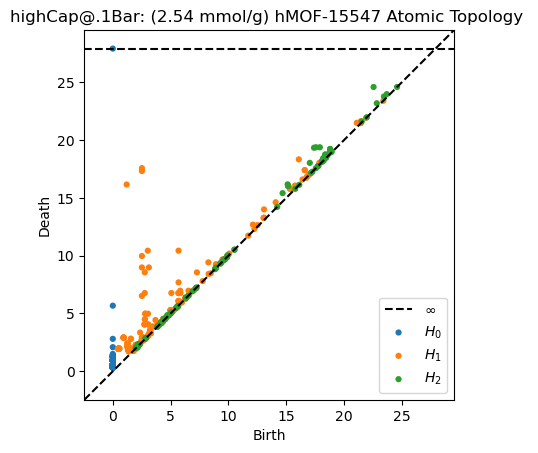

In [78]:
persim.plot_diagrams(alphaToNppdgm(dgm))
plt.title(tittxt)

In [87]:
b=1
regVar="CO2_wc_01"
hIndex=list(trainBins[regVar][b])
i=100
fName=hIndex[i]

cif_name=f"{hinDir}/{fName}.cif"
tittxt=f"lowCap@.1Bar: ({round(hdf[regVar].loc[fName],4)} mmol/g) {fName} Atomic Topology "
struct=Structure.from_file(cif_name,)
st=genAlphaSlider(struct.cart_coords,titlePrefix=tittxt,step=.5)
dgm=st.persistence()

interactive(children=(FloatSlider(value=1.0, description='Alpha:', max=10.0, readout_format='.4f', step=0.5), …

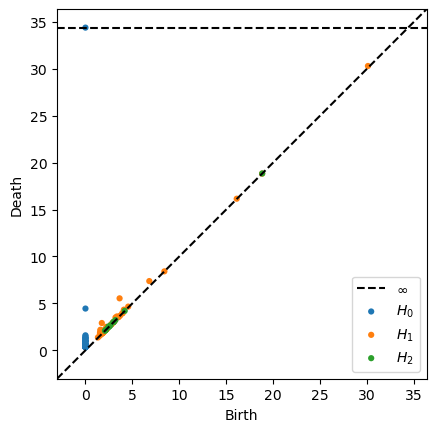

In [85]:
persim.plot_diagrams(alphaToNppdgm(dgm))
#plt.title(tittxt)

In [ ]:
fig = sp.make_subplots(rows=1,cols=2)



In [ ]:
with Image.open(f"c:/code/git/topML/frames/hMOF/alphaComplex/hMOF-5021437 AtomAC_r_2_5.png") as im:
    plt.imshow(im)

# Two extreme outliars

In [ ]:

fName="hMOF-7003364"

cif_name=f"{hinDir}/{fName}.cif"
tittxt=f"highCap@.1Bar: ({round(hdf[regVar].loc[fName],2)} mmol/g) {fName} Atomic Topology "
struct=Structure.from_file(cif_name,)
st=genAlphaSlider(struct.cart_coords,titlePrefix=tittxt,step=.5)
dgm=st.persistence()

In [ ]:
persim.plot_diagrams(alphaToNppdgm(dgm))
plt.title(f"{fName} a-Complex")

In [ ]:
rppdgm=rpp.run("--format distance --dim 2",struct.distance_matrix)
npdgm=[np.array([[float(rppdgm[b][k][0]),float(rppdgm[b][k][1])] for k in range(len(rppdgm[b]))])for b in rppdgm.keys()]
persim.plot_diagrams(npdgm)
plt.title(f"{fName} rips-PBC")

In [ ]:

fName="hMOF-7003278"

cif_name=f"{hinDir}/{fName}.cif"
tittxt=f"highCap@.1Bar: ({round(hdf[regVar].loc[fName],2)} mmol/g) {fName} Atomic Topology "
struct=Structure.from_file(cif_name,)
st=genAlphaSlider(struct.cart_coords,titlePrefix=tittxt,step=.5)
dgm=st.persistence()

In [ ]:
persim.plot_diagrams(alphaToNppdgm(dgm))
plt.title(f"{fName} a-Complex")

In [ ]:
rppdgm=rpp.run("--format distance --dim 2",struct.distance_matrix)
npdgm=[np.array([[float(rppdgm[b][k][0]),float(rppdgm[b][k][1])] for k in range(len(rppdgm[b]))])for b in rppdgm.keys()]
persim.plot_diagrams(npdgm)
plt.title(f"{fName} rips-PBC")

In [ ]:
regVar

# PDhash summaries

In [12]:
with open(f"{inDir}/hMOF_PDhash_sameIndex/train_pdStack_total.pkl", "rb") as f:
    pdXYZhMOF=pickle.load(f)

In [ ]:
binNum=4
with open(f"{inDir}/hMOF_PDhash_sameIndex/train_pdStack_b{binNum}_5.pkl", "rb") as f:
        pdXYZ = pickle.load(f)

In [ ]:
pdXYZCap = boxProjectSet(pdXYZ, hdf, regVar, hIndexMap)

In [13]:
with open(f"{inDir}/hMOF_PDhash_sameIndex/test_pdXYZCap.pkl", "rb") as f:
        pdXYZCap = pickle.load(f)

In [ ]:
saveDir=f"{inDir}/frames/HMOF_quartRes/bin_{binNum}_20"
traces=pdXYZCap.meanFigs(savePref=saveDir,bounds=None,titSuf=" bin 4")

In [ ]:
go.Figure([traces[2]])

In [ ]:
#self=pdXYZCap
#bounds = [np.min([self.bounds[b][0] for b in range(self.maxD+1)]),np.max([self.bounds[b][1] for b in range(self.maxD+1)])]

In [ ]:
pdXYZCap[2]

In [ ]:
indMap={int(s[5:]) for s in trainBins[regVar][-1]}
pdXYZSub=pdXYZhMOF.subsetIndex(lambda x: x in indMap,changeBounds=True)
pdXYZCap = boxProjectSet(pdXYZSub, hdf, regVar, hIndexMap)



In [ ]:
binNum=19
saveDir=f"{inDir}/frames/HMOF_quartRes/bin_{binNum}_20"
traces=pdXYZCap.meanFigs(savePref=saveDir,bounds=None,titSuf=f" bin {binNum}")

In [ ]:
### same as above with general numpy embedding
npBettiEmbed=lambda pdStack,b: pdStack.density_to_numpy(b) # pdStack.mean_to_numpy(b)

binNum=19
traces2=pdXYZCap.npFigProj(savePref=saveDir,bettiProj=npBettiEmbed,bounds=None,titSuf=f"density bin {binNum}")

In [ ]:
pdXYZCap.bounds

In [ ]:
len(bounds)!=3 or not (isinstance(bounds[0], Iterable) and len(bounds[0])!=2)

In [ ]:
len(bounds)==2 and not isinstance(bounds[0], Iterable)

In [ ]:
bounds[0]

In [ ]:
###throw together all b_1 & b_2 for all bins into binsx2 figure, plus ffmpeg combine into movie
bounds = [np.min([pdXYZhMOF.bounds[b][0] for b in range(pdXYZhMOF.maxD+1)]),np.max([pdXYZhMOF.bounds[b][1] for b in range(pdXYZhMOF.maxD+1)])]
roundDig=2


for binNum in range(numBins):
    
    indMap={int(s[5:]) for s in trainBins[regVar][binNum]}
    pdXYZSub=pdXYZhMOF.subsetIndex(lambda x: x in indMap,changeBounds=True)
    pdXYZCap = boxProjectSet(pdXYZSub, hdf, regVar, hIndexMap)
    saveDir=f"{inDir}/frames/HMOF_quartRes/bin_{binNum}_{numBins}_"

    traces=pdXYZCap.meanFigs(savePref=saveDir,bounds=bounds,boxBoundMax=7,titSuf=f"CO2 mmol/g -- [{round(binNum/numBins*100,roundDig)} - {round((binNum+1)/numBins*100,roundDig)}] % percentileBin",showFig=False)
    
# ffmpeg -r 1 -f image2 -s 1920x1080 -i /mnt/z/data/diverse_metals/frames/HMOF_quartRes/bin_%d_20_bALL_mean.png -vcodec libx264 -crf 18 -filter_complex "tpad=stop_duration=2" /mnt/z/data/diverse_metals/frames/HMOF_quartRes_b20_mean.mp4
# ffmpeg -r 1 -f image2 -s 1920x1080 -i /mnt/z/data/diverse_metals/frames/HMOF_quartRes/bin_%d_20_b1_mean.png -vcodec libx264 -crf 18 -filter_complex "tpad=stop_duration=2" /mnt/z/data/diverse_metals/frames/HMOF_quartRes_bet1_b20_mean.mp4



## Now repeat but bins are linker/nodeMOFMap from Xiaoli's summary -- call densityFigs instead, we're looking for maxdensity points



In [14]:
cinDir="c:/code/git/topML/linker_node_stuff"
with open(f"{cinDir}/molSimp_linkerMOFmap_b_all_5.pkl", "rb") as f: ### can we see a large overlap on PDhash density heatmap? 
        linkerMOFmap=pickle.load(f)

In [ ]:
for k,v in linkerMOFmap.items():
    print(k,len(v))

In [15]:
with open(f"{cinDir}/molSimp_nodeMOFmap_b_all_5.pkl", "rb") as f: ### can we see a large overlap on PDhash density heatmap? 
        nodeMOFmap=pickle.load(f)

In [ ]:
for k,v in nodeMOFmap.items():
    print(k,len(v))

In [ ]:
for k,v in nodeMOFmap.items():
    print(k,v[0])

In [20]:
bounds = [np.min([pdXYZhMOF.bounds[b][0] for b in range(pdXYZhMOF.maxD+1)]),np.max([pdXYZhMOF.bounds[b][1] for b in range(pdXYZhMOF.maxD+1)])]
roundDig=2

### same as above with general numpy embedding
npBettiEmbed=lambda pdStack,b: pdStack.density_to_numpy(b) # pdStack.mean_to_numpy(b)

nodeKeys=list(nodeMOFmap.keys())
saveDirs={nodeKeys[k]:f"{inDir}/frames/HMOF_quartRes/node_linker_hm/node_{k}" for k in range(len(nodeKeys))}


for k in nodeKeys:    
    indMap={int(s[5:]) for s in nodeMOFmap[k]}
    pdXYZSub=pdXYZhMOF.subsetIndex(lambda x: x in indMap,changeBounds=True)
    #pdXYZCap = boxProjectSet(pdXYZSub, hdf, regVar, hIndexMap)
    saveDir=saveDirs[k]
    traces=pdXYZSub.npFigProj(savePref=saveDir,boxBoundMax=len(nodeMOFmap[k]),bettiProj=npBettiEmbed,bounds=None,titSuf=f"density node {k} with total {len(nodeMOFmap[k])}")
    # we can grab interest points from pdXYZSub by proportion of density

In [21]:
nodeKeys

['[Zn][O]([Zn])([Zn])[Zn]',
 '[Zn][Zn]',
 '[Cu][Cu]',
 '[V]',
 '[O]12[Zr]34[O]5[Zr]62[O]2[Zr]71[O]4[Zr]14[O]3[Zr]35[O]6[Zr]2([O]71)[O]43',
 '[V]O[V]1[O]2[O]1[V]2O[V]',
 '[V]1[V]O[V]2[O]3[V](O1)[O]23',
 '[O][V]12([O])O[V][V]O[V]3([O]1[O]23)([O])[O]',
 '[O][V]O[V]',
 '[V]1[V]O1',
 '[V]O[V]',
 '[V][V]',
 '[O-]C(=O)C#CC(=O)[O]12[O]3[Zn]452[O]1[C]1C#C[C]2[O]67[Zn]89[O]%105[Zn]5%11%12[O]1[O]15[O]%12[C]5[O]%12[Zn]%13%10([O]%10[C]3C#C[C]([O]39O[C](O[O]8([C](O4)C#C5)O[C](O6)C#CC(=O)OOC(=O)C#CC(=O)OO[C](C#CC1=O)OOC(=O)C#CC(=O)[O-])C#CC(=O)OO[C](OOC(=O)C#C[C](O3)O7)C#CC(=O)OOC(=O)C#CC(=O)[O]%12%13%10)O%11)O2',
 '[V]O[V]O[V]',
 '[V]O[V]1([O])([O])[O]2[O]1[V]2([O])([O])O[V]']

In [43]:
k=nodeKeys[0]

indMap={int(s[5:]) for s in nodeMOFmap[k]}
pdXYZSub=pdXYZhMOF.subsetIndex(lambda x: x in indMap,changeBounds=True)
#pdXYZCap = boxProjectSet(pdXYZSub, hdf, regVar, hIndexMap)
saveDir=saveDirs[k]


In [24]:
pdXYZSub.bounds

[[0.0, 2.75], [1.0, 11.5], [1.5, 14.25]]

In [25]:
pdXYZhMOF.bounds

[[0.0, 10.25], [0.75, 15.0], [1.5, 17.25]]

In [26]:
X=pdXYZSub.density_to_numpy(bi=1)

In [50]:
bi=1
thresh=.99
nodeInterest={pt:len(pdXYZSub[bi][pt])/len(nodeMOFmap[k]) for pt in pdXYZSub.img[bi].keys()  if len(pdXYZSub[bi][pt])/len(nodeMOFmap[k]) > thresh}
intPts=nodeInterest.keys()
nodeInterest #we hope for this to decrease as we increase pixel resolution to .1

{(2.0, 3.25): 0.9999704159517189}

In [51]:
len(nodeMOFmap[k])/len(set.intersection(*(set(pdXYZhMOF.img[bi][k].keys()) for k in intPts)))

0.7568572132285439

In [69]:
thresh=.95
nodeInterest={bi:{pt:len(pdXYZSub[bi][pt])/len(nodeMOFmap[k]) for pt in pdXYZSub.img[bi].keys()  if len(pdXYZSub[bi][pt])/len(nodeMOFmap[k]) > thresh} for bi in range(3)}
intPts={bi:set(nodeInterest[bi].keys()) for bi in range(3)}
nodeInterest #we hope for this to decrease as we increase pixel resolution to .1

{0: {(0.0, 1.25): 1.0, (0.0, 1.5): 1.0, (0.0, 2.0): 1.0},
 1: {(2.0, 3.25): 0.9999704159517189},
 2: {(3.25, 3.25): 1.0}}

In [68]:

k=nodeKeys[0]
nodeInterest={bi:{pt:len(pdXYZSub[bi][pt])/len(nodeMOFmap[k]) for pt in pdXYZSub.img[bi].keys()  if len(pdXYZSub[bi][pt])/len(nodeMOFmap[k]) > thresh} for bi in range(3)}
intPts={bi:set(nodeInterest[bi].keys()) for bi in range(3)}
#nodeInterest
len(nodeMOFmap[k])/len(set.intersection(*(set(pdXYZhMOF.img[bi][pt].keys()) for bi in range(3) for pt in intPts[bi] )))

0.8859359438066782

In [67]:
k

'[Zn][O]([Zn])([Zn])[Zn]'

In [ ]:
len(set.intersection(*(set(pdXYZhMOF.img[bi][k].keys()) for k in intPts)))

In [19]:
65*.25

16.25

In [ ]:
(17.25-1.5)/.25

In [ ]:
bounds = [np.min([pdXYZhMOF.bounds[b][0] for b in range(pdXYZhMOF.maxD+1)]),np.max([pdXYZhMOF.bounds[b][1] for b in range(pdXYZhMOF.maxD+1)])]
roundDig=2

### same as above with general numpy embedding
npBettiEmbed=lambda pdStack,b: pdStack.density_to_numpy(b) # pdStack.mean_to_numpy(b)

linkKeys=list(linkerMOFmap.keys())
saveDirs={linkKeys[k]:f"{inDir}/frames/HMOF_quartRes/node_linker_hm/linkers/L_{k}" for k in range(len(linkKeys))}


for k in linkKeys: 
    
    indMap={int(s[5:]) for s in linkerMOFmap[k]}
    pdXYZSub=pdXYZhMOF.subsetIndex(lambda x: x in indMap,changeBounds=True)
    #pdXYZCap = boxProjectSet(pdXYZSub, hdf, regVar, hIndexMap)
    saveDir=saveDirs[k]
    traces=pdXYZSub.npFigProj(savePref=saveDir,boxBoundMax=len(linkerMOFmap[k]),bounds=bounds,bettiProj=npBettiEmbed,titSuf=f"density linker {k} with total {len(linkerMOFmap[k])}")


## Using set subtraction to find interest points / convolutions
- for the test set, we can try looking for any overlap, or maybe some function/blur on the train convolution

In [ ]:
for k,v in linkKeys.items():
    print(k,v[0])

In [ ]:
pdXYZSub.density_to_numpy(1)

In [ ]:
pdXYZSubs=[
    pdXYZhMOF.subsetIndex(lambda x: x in {int(s[5:]) for s in trainBins[regVar][binNum]},changeBounds=True) for binNum in range(numBins)]

In [ ]:
j=19
b=1
interest=set(pdXYZSubs[j].img[b].keys())
for i in set(range(numBins))-set(j):
    if len(interest)==0:
        break
    else:
        interest=interest-set(pdXYZSubs[i].img[b].keys())